# Importing all the relevant libraries

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import random
import time
import plotly.express as px
import chart_studio.plotly as py
import plotly.offline as po
import plotly.graph_objs as pg

sns.set()

# Getting the data set and analyzing it

In [8]:
data = pd.read_csv("WorldHappiness2019.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [9]:
data.describe()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,78.500000,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,45.177428,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,1.000000,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,78.500000,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,117.250000,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,156.000000,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


In [10]:
data.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [11]:
newdata = pd.get_dummies(data, drop_first = True)
newdata.head()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Country or region_Albania,Country or region_Algeria,...,Country or region_United Arab Emirates,Country or region_United Kingdom,Country or region_United States,Country or region_Uruguay,Country or region_Uzbekistan,Country or region_Venezuela,Country or region_Vietnam,Country or region_Yemen,Country or region_Zambia,Country or region_Zimbabwe
0,1,7.769,1.340,1.587,0.986,0.596,0.153,0.393,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,7.600,1.383,1.573,0.996,0.592,0.252,0.410,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,7.554,1.488,1.582,1.028,0.603,0.271,0.341,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,7.494,1.380,1.624,1.026,0.591,0.354,0.118,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,7.488,1.396,1.522,0.999,0.557,0.322,0.298,0,0,...,0,0,0,0,0,0,0,0,0,0


it took  1.6189994812011719 seconds to create the map


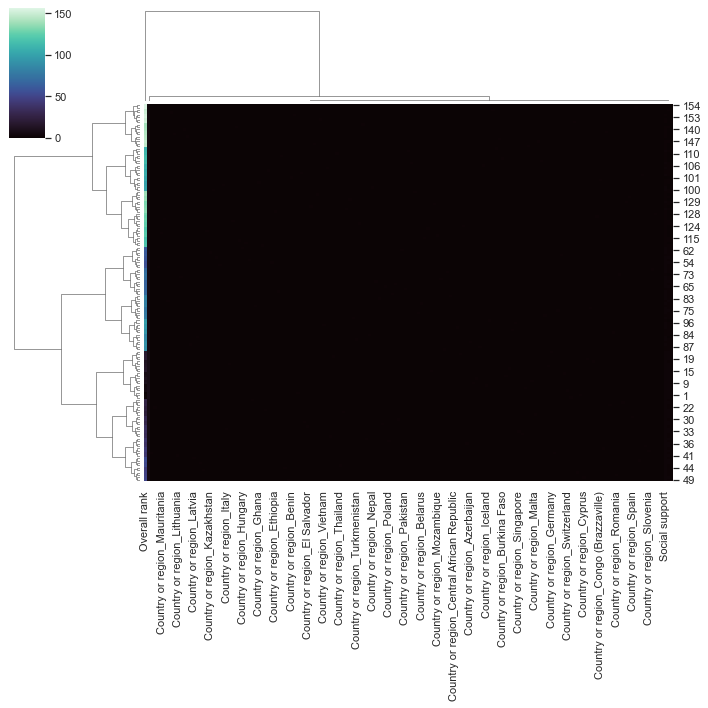

In [12]:
t0 = time.time()
sns.clustermap(newdata, cmap='mako')
timetakentoexec = time.time()-t0
print("it took ", timetakentoexec, "seconds to create the map")

## Creating the world map to populate our data with

In [13]:
po.init_notebook_mode(connected = True)

In [40]:
temp = data.drop(columns = ['Country or region'], axis = 1)

mapdata = dict(type = "choropleth", 
    locations =  data['Country or region'],
    locationmode = "country names" ,
    z = data['Score'], 
    text= data['Country or region']
)

# Analysing Happiness in 2019

In [29]:
layout = dict(title = 'World Happiness Index Report Based on Score', 
    geo = dict(showlakes = True, 
        lakecolor = 'rgb(0,191,255)'
    )
)

t1 = time.time()
x = pg.Figure(data = [mapdata], layout = layout)
po.iplot(x)
timemap = time.time()-t1
print("it took ", timemap, "seconds to create the map")

it took  0.0820004940032959 seconds to create the map


In [31]:
mapdata = dict(type = "choropleth", 
    locations =  data['Country or region'],
    locationmode = "country names" ,
    z = data['GDP per capita'], 
    text= data['Country or region']
)

layout = dict(title = 'World Happiness Index Report Based on GDP Per Capita', 
    geo = dict(showlakes = True, 
        lakecolor = 'rgb(0,191,255)'
    )
)

t1 = time.time()
x = pg.Figure(data = [mapdata], layout = layout)
po.iplot(x)
timemap = time.time()-t1
print("it took ", timemap, "seconds to create the map")

it took  0.10700392723083496 seconds to create the map


In [32]:
mapdata = dict(type = "choropleth", 
    locations =  data['Country or region'],
    locationmode = "country names" ,
    z = data['Social support'], 
    text= data['Country or region']
)

layout = dict(title = 'World Happiness Index Report Based on Social support', 
    geo = dict(showlakes = True, 
        lakecolor = 'rgb(0,191,255)'
    )
)

t1 = time.time()
x = pg.Figure(data = [mapdata], layout = layout)
po.iplot(x)
timemap = time.time()-t1
print("it took ", timemap, "seconds to create the map")

it took  0.08999371528625488 seconds to create the map


In [33]:
mapdata = dict(type = "choropleth", 
    locations =  data['Country or region'],
    locationmode = "country names" ,
    z = data['Healthy life expectancy'], 
    text= data['Country or region']
)

layout = dict(title = 'World Happiness Index Report Based on Healthy life expectancy', 
    geo = dict(showlakes = True, 
        lakecolor = 'rgb(0,191,255)'
    )
)

t1 = time.time()
x = pg.Figure(data = [mapdata], layout = layout)
po.iplot(x)
timemap = time.time()-t1
print("it took ", timemap, "seconds to create the map")

it took  0.09399271011352539 seconds to create the map


In [34]:
mapdata = dict(type = "choropleth", 
    locations =  data['Country or region'],
    locationmode = "country names" ,
    z = data['Freedom to make life choices'], 
    text= data['Country or region']
)

layout = dict(title = 'World Happiness Index Report Based on Freedom to make life choices', 
    geo = dict(showlakes = True, 
        lakecolor = 'rgb(0,191,255)'
    )
)

t1 = time.time()
x = pg.Figure(data = [mapdata], layout = layout)
po.iplot(x)
timemap = time.time()-t1
print("it took ", timemap, "seconds to create the map")

it took  0.11300778388977051 seconds to create the map


In [35]:
mapdata = dict(type = "choropleth", 
    locations =  data['Country or region'],
    locationmode = "country names" ,
    z = data['Generosity'], 
    text= data['Country or region']
)

layout = dict(title = 'World Happiness Index Report Based on Generosity', 
    geo = dict(showlakes = True, 
        lakecolor = 'rgb(0,191,255)'
    )
)

t1 = time.time()
x = pg.Figure(data = [mapdata], layout = layout)
po.iplot(x)
timemap = time.time()-t1
print("it took ", timemap, "seconds to create the map")

it took  0.11600947380065918 seconds to create the map


In [36]:
mapdata = dict(type = "choropleth", 
    locations =  data['Country or region'],
    locationmode = "country names" ,
    z = data['Perceptions of corruption'], 
    text= data['Country or region']
)

layout = dict(title = 'World Happiness Index Report Based on Perceptions of corruption', 
    geo = dict(showlakes = True, 
        lakecolor = 'rgb(0,191,255)'
    )
)

t1 = time.time()
x = pg.Figure(data = [mapdata], layout = layout)
po.iplot(x)
timemap = time.time()-t1
print("it took ", timemap, "seconds to create the map")

it took  0.1289980411529541 seconds to create the map
